## PARAMETERS
* number of customers for each class (ENV)
* conversion rate for each class (item 1) (ENV)
* Second item can be promoted: p0,p1,p2,p3,p4
* Conversion rate item 2 (ENV)
* promos will affect the conversion rates
* prices

In [6]:
import utilities
import numpy as np
import statistics
from scipy.stats import truncnorm
from scipy.optimize import linear_sum_assignment
import random
import itertools
import matplotlib.pyplot as plt

import Environment
import Shop

In [9]:
shop = Shop.Shop()
env = Environment.Environment(shop.prices1, shop.prices2, shop.discounts)

shop.set_conv_rate(env.true_conv1, env.true_conv2)
shop.best_promo_per_class()

T = 20
total_revenue = []
total_clairvoyant = []

for t in range(T):
    env.generate_next_day_customers()
    shop.set_expected_customers(env.customers)

    revenue = []
    clairvoyant = []

    for idx,c in enumerate(shop.customers): # [10,20,30,40] --> [(0,10), (1,20), ...]
        for cust in range(c):
            partial_revenue = 0
            has_bought1 = env.round1(idx, shop.best_price[0])
            partial_revenue = has_bought1*shop.best_price[0]

            if has_bought1 == 1:
                has_bought2 = env.round2(idx, shop.matched_promos[idx], shop.best_price[1])
                partial_revenue += has_bought2*shop.best_price[1]*(1-shop.discounts[shop.matched_promos[cust]])

            revenue.append(partial_revenue)
            expected_revenue = shop.best_price[0]*env.true_conv1[idx, utilities.index(env.prices1, shop.best_price[0])] + env.true_conv1[idx, utilities.index(env.prices1, shop.best_price[0])]*env.true_conv2[idx, shop.matched_promos[idx], utilities.index(env.prices1, shop.best_price[0])]*shop.best_price[1]*(1-shop.matched_promos[idx])
            clairvoyant.append(expected_revenue)   
      
    total_revenue.append([np.mean(revenue)])
    total_clairvoyant.append([np.mean(clairvoyant)])

False
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--
HOW
--


Text(0, 0.5, 'Revenue')

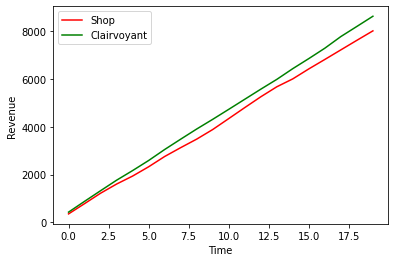

In [8]:
plt.plot(np.cumsum(total_revenue), color='red', label='Shop')
plt.plot(np.cumsum(total_clairvoyant), color='green', label='Clairvoyant')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Revenue')

Text(0, 0.5, 'Revenue')

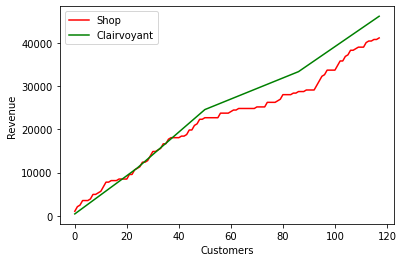

In [5]:
plt.plot(np.cumsum(revenue), color='red', label='Shop')
plt.plot(np.cumsum(clairvoyant), color='green', label='Clairvoyant')

plt.legend()
plt.xlabel('Customers')
plt.ylabel('Revenue')

In [10]:
shop.best_price

(560.0, 700.0)